# GSEA command line script and plotting

__Author__: Elisabeth F. Heuston

## Purpose

Notebook contains script for automating GSEA across ranked files using input gmt lists.

## Workbook setup

### Import python3.7 modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import os, re, glob
import seaborn as sns

### Functions

### create_table_of_averages

In [2]:
def create_column_dictionary(counts_table):
    column_dict = {}
    for name in counts_table.columns:
        m = re.split('(_r\d+)$', name)
        if any(['_r' in element for element in m]):
            column_dict.setdefault(m[0], [])
            column_dict[m[0]].append(name)
    return column_dict
    print("Created column dictionary")
    

def create_table_of_averages(counts_table):
    column_dict = {}
    column_dict = create_column_dictionary(counts_table)
    table_of_averages = pd.DataFrame()
    for celltype in column_dict.keys():
        table_of_averages[celltype + 'avg'] = counts_table[column_dict[celltype]].mean(axis = 1)
    return table_of_averages
    print("Created table of average counts")
    

## Gene set enrichment analysis

Ranked gene lists and gmt files are generated in R (see __.X__)  
Calculates are performed by edgeR and DESeq2

Gene set enrichment analysis is performed in GSEA (Broad Institute, version 4.1.0) and is called via the command line below:

### GSEA command

In [47]:
# Generate list of GSEA commands and run them
def bulk_gsea_run(rnk_list, gmt_list, out_dir = "./", rnk_regex_match = '(.+)(?=.rnk)'):
    
    gsea_cmds = []
    for rnk_file in rnk_list:
        rnk_match = re.compile(rnk_regex_match)
        for gmt in gmt_list:
            outname = re.match(rnk_match, os.path.basename(rnk_file)).group()
            outgmt = re.split('\.gmt', os.path.basename(gmt))[0]
            outfile = '_'.join((outname, outgmt))
            gsea_cmd = ''.join(('~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx ', 
                                gmt,
                                ' -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk ', 
                                 rnk_file, 
                                ' -scoring_scheme weighted -rpt_label ',
                                outfile, 
                                ' -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ', 
                                out_dir))
            gsea_cmds.append(gsea_cmd)
    

    for cmd in gsea_cmds:
        print("running", cmd, "\n")
        os.system(cmd)


In [158]:
gmts = glob.glob('/Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/*all.v7.4.symbols.gmt') + glob.glob('/Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_unique*')
rnk_files = glob.glob('/Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/*.rnk')

os.chdir("/Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/")
bulk_gsea_run(rnk_list=rnk_files, gmt_list=gmts, out_dir="./")

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster22.rnk -scoring_scheme weighted -rpt_label res.0.5cluster22_c8 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster22.rnk -scoring_scheme weighted -rpt_label res.0.5cluster22_c2 -create_svgs false -inclu

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster20.rnk -scoring_scheme weighted -rpt_label res.0.5cluster20_h -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster20.rnk -scoring_scheme weighted -rpt_label res.0.5cluster20_BulkPops_uniqueTPM1 -create_sv

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster9.rnk -scoring_scheme weighted -rpt_label res.0.5cluster9_c8 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster9.rnk -scoring_scheme weighted -rpt_label res.0.5cluster9_c2 -create_svgs false -include_o

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster5.rnk -scoring_scheme weighted -rpt_label res.0.5cluster5_h -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster5.rnk -scoring_scheme weighted -rpt_label res.0.5cluster5_BulkPops_uniqueTPM1 -create_svgs f

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster7.rnk -scoring_scheme weighted -rpt_label res.0.5cluster7_c8 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster7.rnk -scoring_scheme weighted -rpt_label res.0.5cluster7_c2 -create_svgs false -include_o

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster2.rnk -scoring_scheme weighted -rpt_label res.0.5cluster2_h -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster2.rnk -scoring_scheme weighted -rpt_label res.0.5cluster2_BulkPops_uniqueTPM1 -create_svgs f

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster17.rnk -scoring_scheme weighted -rpt_label res.0.5cluster17_c8 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster17.rnk -scoring_scheme weighted -rpt_label res.0.5cluster17_c2 -create_svgs false -inclu

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster14.rnk -scoring_scheme weighted -rpt_label res.0.5cluster14_h -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster14.rnk -scoring_scheme weighted -rpt_label res.0.5cluster14_BulkPops_uniqueTPM1 -create_sv

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster10.rnk -scoring_scheme weighted -rpt_label res.0.5cluster10_c8 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster10.rnk -scoring_scheme weighted -rpt_label res.0.5cluster10_c2 -create_svgs false -inclu

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster13.rnk -scoring_scheme weighted -rpt_label res.0.5cluster13_BulkPops_uniqueTPM1 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM10.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc/res.0.5cluster13.rnk -scoring_scheme weighted -rpt_label res.0.5cluster13_BulkPops_u

## Plot results

### generate df

In [74]:
os.getcwd()

'/Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/msAggr_seurat/RankList_res.0.5_findAll_hgnc'

In [133]:
fdr_limit = 0.1
# Search through GSEA directories for tsv summary files
file_list = []
for gsea_dir in os.listdir('./'):
    if re.match('.+cluster.+', gsea_dir) and os.path.isdir(gsea_dir):
#         print('Searching', gsea_dir)
        for gsea_file in os.listdir(os.path.join(gsea_dir)):
            if bool(re.match('gsea.+na_[pos|neg].+.tsv', gsea_file)) == True:
                file_list.append(os.path.join(gsea_dir, gsea_file))
                
goAll_list = []
go_writelist = []

# Load summary files into go_alldf table
for file in file_list:
    filename =re.match('^(.+)(?=.GseaPreranked)', file)[0]

    df = pd.DataFrame()
    goAll_file = pd.read_csv(file, sep = '\t')
    goAll_file['File'] = filename
    df['Pathway'] = goAll_file['NAME']
    df['File'] = filename
    df['size'] = pd.to_numeric(goAll_file['SIZE'])
    df['NES'] = goAll_file['NES']
    df['FDR'] = goAll_file['FDR q-val']
    goAll_list.append(df)
    go_writelist.append(goAll_file)
go_alldf = pd.concat(goAll_list, axis = 0, ignore_index = True)


# Limit table to only entries with FDR <= 0.25
print(sigDF.shape)
sig_goalldf = go_alldf[go_alldf['FDR'] <= fdr_limit].sort_values('Pathway')
sig_goalldf['NES'] = pd.to_numeric(sig_goalldf['NES'])
sig_goalldf = sig_goalldf.drop('FDR', axis = 1)
sig_goalldf['File'] = sig_goalldf['File'].apply(lambda x:  pd.Series(str(x).split("vC")[0]))
sig_goalldf = pd.melt(sig_goalldf, id_vars=['Pathway', 'File'])
sig_size = sig_goalldf[sig_goalldf['variable'] == 'size'].copy()
sig_size.drop('variable', inplace = True, axis = 1)
sig_size = sig_size.rename(columns = {'value': 'size'})
sig_nes = sig_goalldf[sig_goalldf['variable'] == 'NES'].copy()
sig_nes.drop('variable', inplace = True, axis = 1)
sig_nes = sig_nes.rename(columns = {'value': 'NES'})
sigDF = pd.merge(left = sig_size, right = sig_nes, left_on=['File', 'Pathway'], right_on = ['File', 'Pathway'])

# Format order of x and y axes
# pathwayorder = ['LSK', 'CMP', 'GMP', 'MK', 'ERY']
# fileorder = ['c3s', 'c10', 'c11', 'c17']
# spacefiller = pd.DataFrame({'Pathway':['LSK'], 'File': ['c3s'], 'size': [0], 'NES':[0]})
# sigDF = sigDF.append(spacefiller)
# sigDF['Pathway'] = pd.Categorical(sigDF['Pathway'], categories=['LSK', 'CMP', 'GMP', 'MK', 'ERY'], ordered=True)
# sigDF['File'] = pd.Categorical(sigDF['File'], categories=fileorder, ordered=True)
print(sigDF.head())



(3201, 4)
                       Pathway                 File  size       NES
0     ABBUD_LIF_SIGNALING_1_UP  res.0.5cluster20_c2  11.0 -2.125049
1                ABE_INNER_EAR  res.0.5cluster21_c2  12.0 -2.279045
2                ABE_INNER_EAR  res.0.5cluster18_c2   8.0 -2.040562
3  ABRAMSON_INTERACT_WITH_AIRE  res.0.5cluster21_c2  31.0 -1.948098
4  ABRAMSON_INTERACT_WITH_AIRE  res.0.5cluster20_c2  23.0  2.071485


### plot data

In [135]:
sigDF[sigDF.File.str.endswith('TPM10')]

,Pathway,File,size,NES
426,CMPAVG,res.0.5cluster18_BulkPops_uniqueTPM10,46.0,-2.341888
1748,MKAVG,res.0.5cluster20_BulkPops_uniqueTPM10,41.0,-2.076023
1752,MKAVG,res.0.5cluster18_BulkPops_uniqueTPM10,122.0,2.388456
1753,MKAVG,res.0.5cluster21_BulkPops_uniqueTPM10,67.0,3.698392
1754,MKAVG,res.0.5cluster22_BulkPops_uniqueTPM10,19.0,2.636139


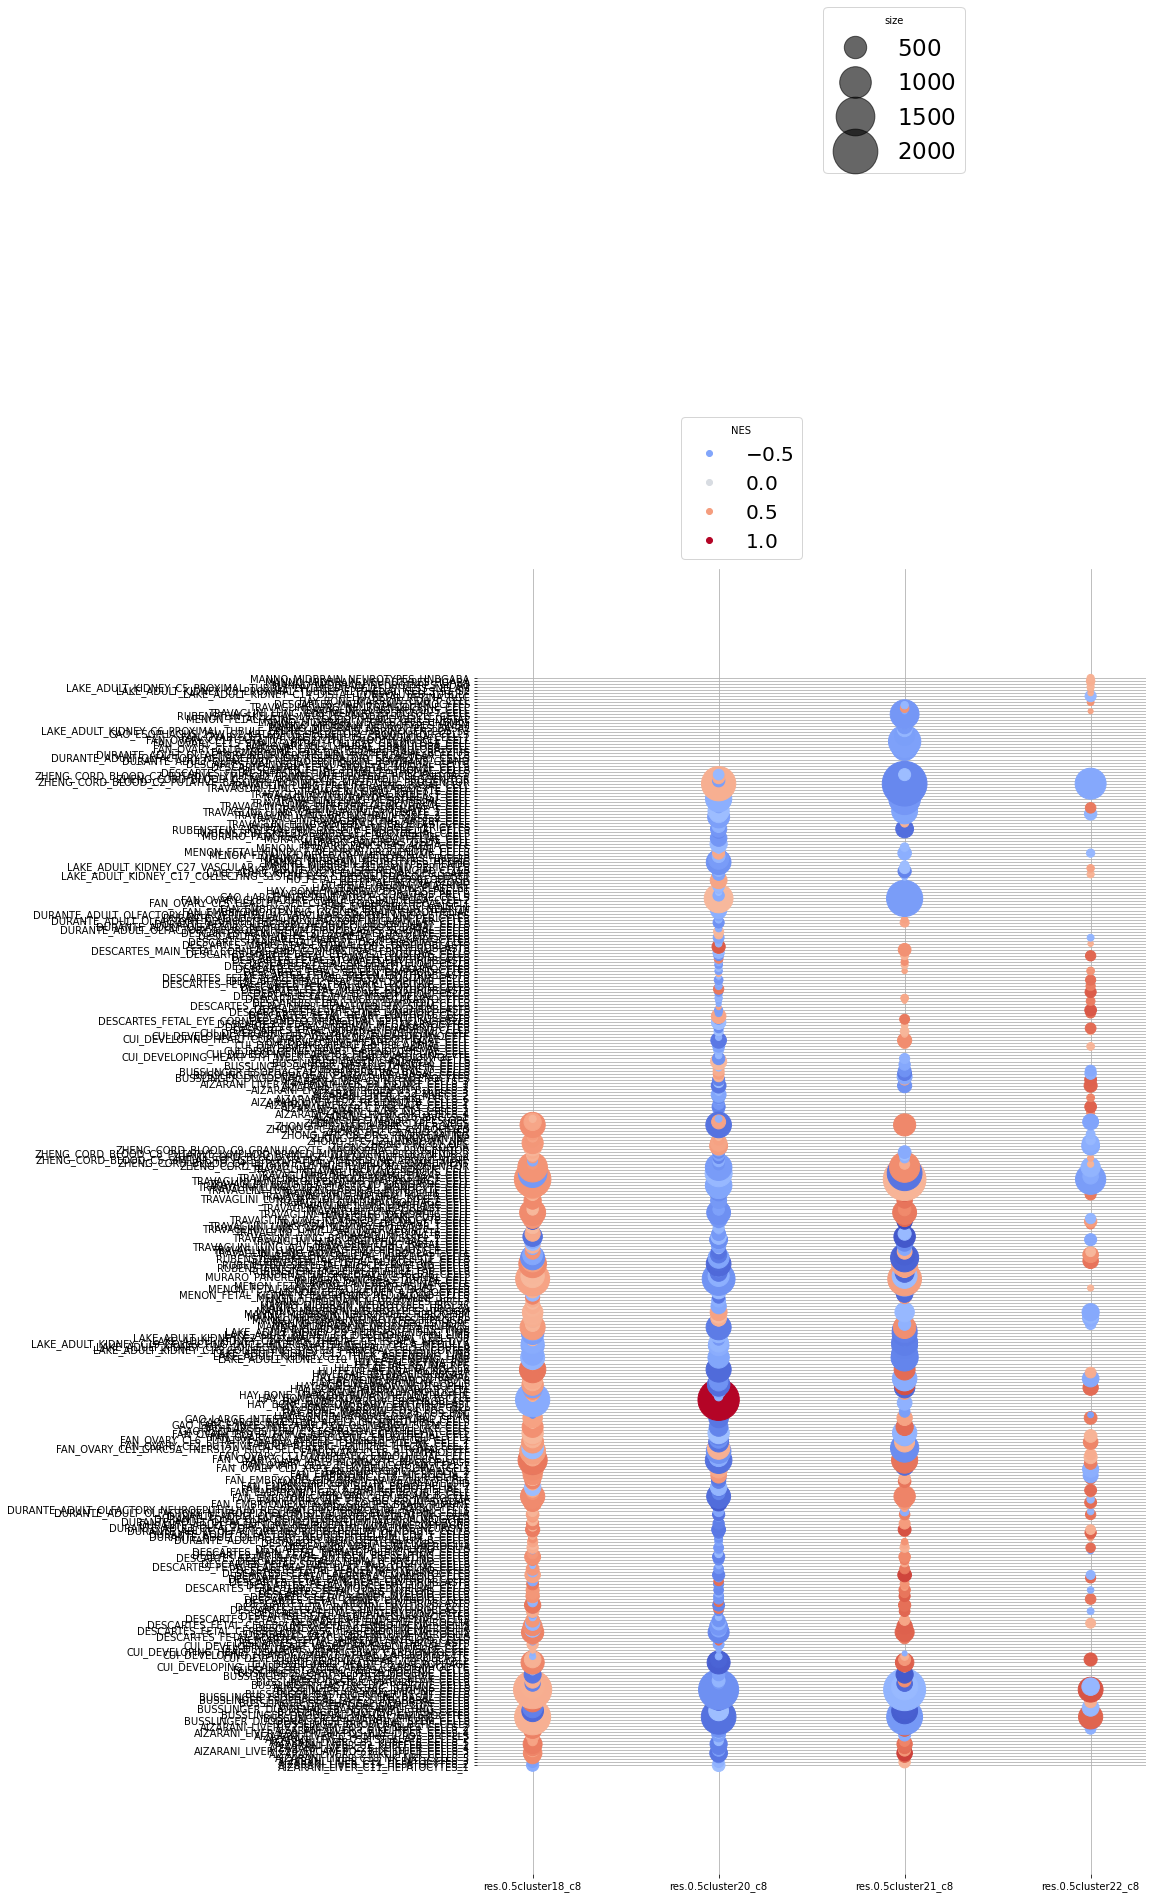

In [141]:
plotDF = sigDF.copy()
plotDF = plotDF[plotDF.File.str.endswith('_c8')]

# Normalize size and NES score for plotting
plotDF = plotDF.sort_values(['File', 'Pathway'])
size_norm = plotDF['size']/plotDF['size'].max()
nes_norm = plotDF['NES']/plotDF['NES'].max()

fig, ax = plt.subplots(figsize = (12,24))
scatter = ax.scatter(data = plotDF, x = 'File', y = 'Pathway', c = nes_norm, s = size_norm * 2000, cmap = 'coolwarm')
ax.margins(y = .1, x = .1)
ax.grid(True)
ax.set_axisbelow(True)
plt.box(on = None)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num = 5), loc="lower right", title="NES", bbox_to_anchor=(.5, 1), prop={'size': 20}) # note color is normalized
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(num =5, prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper left", title="size", bbox_to_anchor=(.5,1.44), prop={'size': 23}) # note size is normalized

plt.show()


# merge 10x and biomark

In [77]:
gmts = glob.glob('/Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/*all.v7.4.symbols.gmt') + glob.glob('/Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_unique*')
# gmts = ['/Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt']
rnk_files = glob.glob('/Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/*.rnk')

os.chdir("/Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/")
bulk_gsea_run(rnk_list=rnk_files, gmt_list=gmts, out_dir="./")

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster10.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster10_c8.all.v7.4.symbols -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hg

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster13.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster13_c2.all.v7.4.symbols -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c3.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hg

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c3.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster14.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster14_c3.all.v7.4.symbols -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgn

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/h.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster7.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster7_h.all.v7.4.symbols -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/M

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM1.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster4.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster4_BulkPops_uniqueTPM1 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM10.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgn

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/BulkPops_uniqueTPM10.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster1.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster1_BulkPops_uniqueTPM10 -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hg

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c8.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc/Mergebiomark167With10XpctVar95res.0.5cluster9.rnk -scoring_scheme weighted -rpt_label Mergebiomark167With10XpctVar95res.0.5cluster9_c8.all.v7.4.symbols -create_svgs false -include_only_symbols true -make_sets true -plot_top_x 20 -rnd_seed timestamp -set_max 500 -set_min 5 -zip_report false -out ./ 

running ~/Desktop/Apps/GSEA_4.1.0/gsea-cli.sh GSEAPreranked -gmx /Users/heustonef/Desktop/CMPSubpops/CharacterizeSubpops/GSEA/SelectGeneSets/c2.all.v7.4.symbols.gmt -collapse No_Collapse -mode Max_probe -norm meandiv -nperm 20000 -rnk /Users/heustonef/Desktop/10XGenomicsData/msAggr_scRNASeq/MergeBiomarkWith10X/RankList_pctVar95res.0.5_findAll_hgnc